In [1]:
import numpy as np
import pandas
import functools
from muctpi_overlap import SectorNumberConverter, Geometry,OverlapConfig,process_candidates


g = Geometry('../Data_RoI_Mapping_EF.txt','../Data_ROI_Mapping_Barrel.txt')
df = g.df
df_original = df.copy()

oc = OverlapConfig('./data10_7TeV.periodI.physics_Muons.MuCTPI_LUT.AllOverlaps_composedEF.v002.xml')

0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


/Users/lukasheinrich/Code/muctpi/overlapremo/muctpi_overlap.py:183: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  self.df = pd.concat([df_barrel,df_endcap,df_forward],ignore_index=True)


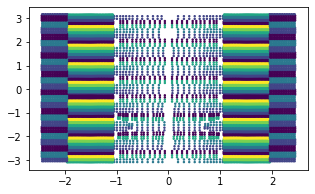

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
mydf = df[functools.reduce(np.logical_and,[df.mioct_number <10,df.dettype < 3])]
plt.scatter(mydf.eta,mydf.phi, c = mydf.inoct_sector,s=2)
plt.gcf().set_size_inches(5,3)

In [3]:
idx = process_candidates(oc,df)
df.loc[idx,['is_overlap']] = True    

9403 pairs found


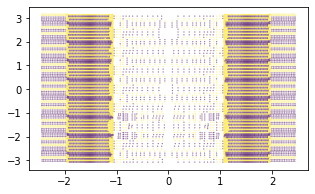

In [4]:
mydf = df[df.mioct_number <10]
plt.scatter(mydf.eta,mydf.phi,c = mydf.is_overlap, s = .05)
plt.gcf().set_size_inches(5,3)
plt.savefig('plot2.pdf')

In [5]:
!open plot2.pdf

In [6]:
s = df.sample(500)
s = pandas.DataFrame(s.values,columns = s.columns)
s['is_overlap_forreal'] = False
s

dettype       eta    etamax    etamin inoct_sector is_overlap  \
0         2  0.401465  0.452099  0.350831            2       True   
1         0  -1.30639  -1.29159   -1.3212            1      False   
2         0  -1.23765  -1.22256  -1.25273            4       True   
3         1  -2.40695  -2.39044  -2.42347            1       True   
4         0   1.45254   1.46282   1.44225            4       True   
..      ...       ...       ...       ...          ...        ...   
495       0  -1.33574   -1.3212  -1.35028            3      False   
496       0   1.06732   1.07466   1.05997            0       True   
497       0   1.59962   1.61037   1.58887            3      False   
498       0   1.90056   1.91341   1.88771            4       True   
499       1  -2.28089  -2.26377    -2.298            1      False   

    mioct_number       phi   phimax   phimin roiid sector side  \
0              5  -2.18663 -2.13318 -2.24008     6     20    0   
1              2   1.35766  1.37557  1.33976    37     12    1   
2              5  -2.21359 -2.19677  -2.2304    31     33    1   
3              0   0.23263  0.26532  0.19994    56      1    1   
4              2   1.71314  1.73022  1.69605    63     15    0   
..           ...       ...      ...      ...   ...    ...  ...   
495            0  0.048665  0.06657  0.03076    41      2    1   
496            0 -0.346275 -0.32837 -0.36418     2     47    0   
497            5  -2.30753 -2.28963 -2.32543    89     32    0   
498            2   1.82069  1.83955  1.80183   136     15    0   
499            5  -2.19188 -2.15624 -2.22752    41     16    1   

     is_overlap_forreal  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  
..                  ...  
495               False  
496               False  
497               False  
498               False  
499               False  

[500 rows x 14 columns]

In [7]:
idx = process_candidates(oc,s)
s.loc[idx,['is_overlap_forreal']] = True

4 pairs found


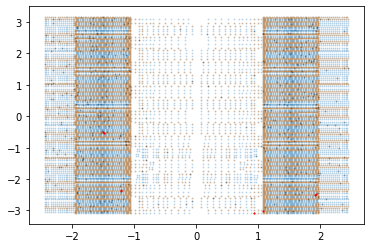

In [8]:
f,ax = plt.subplots(1,1)
ax.scatter(df.eta,df.phi,s=1, alpha = 0.2)
ax.scatter(df[df.is_overlap].eta,df[df.is_overlap].phi,s=1, alpha = 0.2)
ax.scatter(s.eta,s.phi,s=1, alpha = 0.2, c = 'k')

d = s[s.is_overlap_forreal]
ax.scatter(d.eta,d.phi,c = 'r',s=1)

plt.savefig('plot2.pdf')

In [9]:
!open plot2.pdf

In [ ]:
np.arange(16) // 8

In [ ]:
oc.global_pairs[1]